# Angular Momentum Evolution of Low Mass Stars

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import mpmath as mp
import time
import pandas as pd
from mpmath import lambertw
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from mpmath.calculus.optimization import Secant
import os

matplotlib.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            # Use ASCII minus
                            'axes.unicode_minus': False,
                            })

# PHYSICAL CONSTANTS USED CGS UNITS
M_sun = 1.99e33 # Solar mass
R_sun = 6.96e10 # Solar radius
G = 6.673e-8 # Gravitational constant
k = 1.38e-16 # Boltzmann constant
T = 3e6 # Assume constant coronal temperature of 10^6 K
m_H = 1.673e-24 # Hydrogen mass
R_J = 7.14e9 # Jupyter radius
mu = 0.6 # mean molecular weight
cs = np.sqrt(3*k*T/(mu*m_H)) # Sound speed
number_density = 3e7 # number density at the coronal base

# SET ARBITRARY PRECISION
mp.mp.dps = 30 

import warnings
warnings.filterwarnings("ignore")

In [3]:
%cd /content/drive/MyDrive/Angular_Momentum
from Evolution_copy import Star

/content/drive/MyDrive/Angular_Momentum


## Star Model

We characterise a star using 3 parameters:

 * $l$ - ratio of gravitational energy to thermal energy, 

 * $\kappa$ - ratio of rotational energy to gravitational energy,  and 
 
 * $\zeta$ - ratio of magnetic energy to thermal energy.

These parameters dictate the amount of mass and angular momentum loss from a star.

### Field Configuration

Although we assume that the stars have a **dipolar field** configuration, some of the fieldlines are "open" due to the thermal pressure. The co-latitude $\theta$ of the critical fieldline $S_{crit} = \sin^2\theta_m$, beyond which all fieldlines are open can be calculated using 

$ l(S_{crit} -1) + \frac{1}{2}\kappa l \left(S_{crit}^{-2} - S_{crit}\right) = \ln\zeta +6\ln S_{crit} $ [(Owen & Adams, 2014)](https://arxiv.org/abs/1408.3636). 

We can find the critical fieldline and plot the field configuration of this star.

Consider **Star A** with $l = 1$, $\kappa = 0.01$ and $\zeta = 100$. And **Star B** with $l = 1$, $\kappa = 0.01$ and $\zeta = 1$. (The stars are identical but Star B has a much weaker magnetic field strength)

In [4]:
S1 = Star(None, None, None, None, set_l = 1, set_kappa = 0.01, set_zeta = 10**3)
S2 = Star(None, None, None, None, set_l = 1, set_kappa = 0.01, set_zeta = 5)

In [5]:
print('Critical fieldline, S_crit = ', S1.last_fieldline)
print('Critical fieldline, S_crit = ', S2.last_fieldline)

Critical fieldline, S_crit =  0.283490134189710424489611752521
Critical fieldline, S_crit =  0.732011359929853338236120833411


Text(0.5, 1.0, 'Star B')

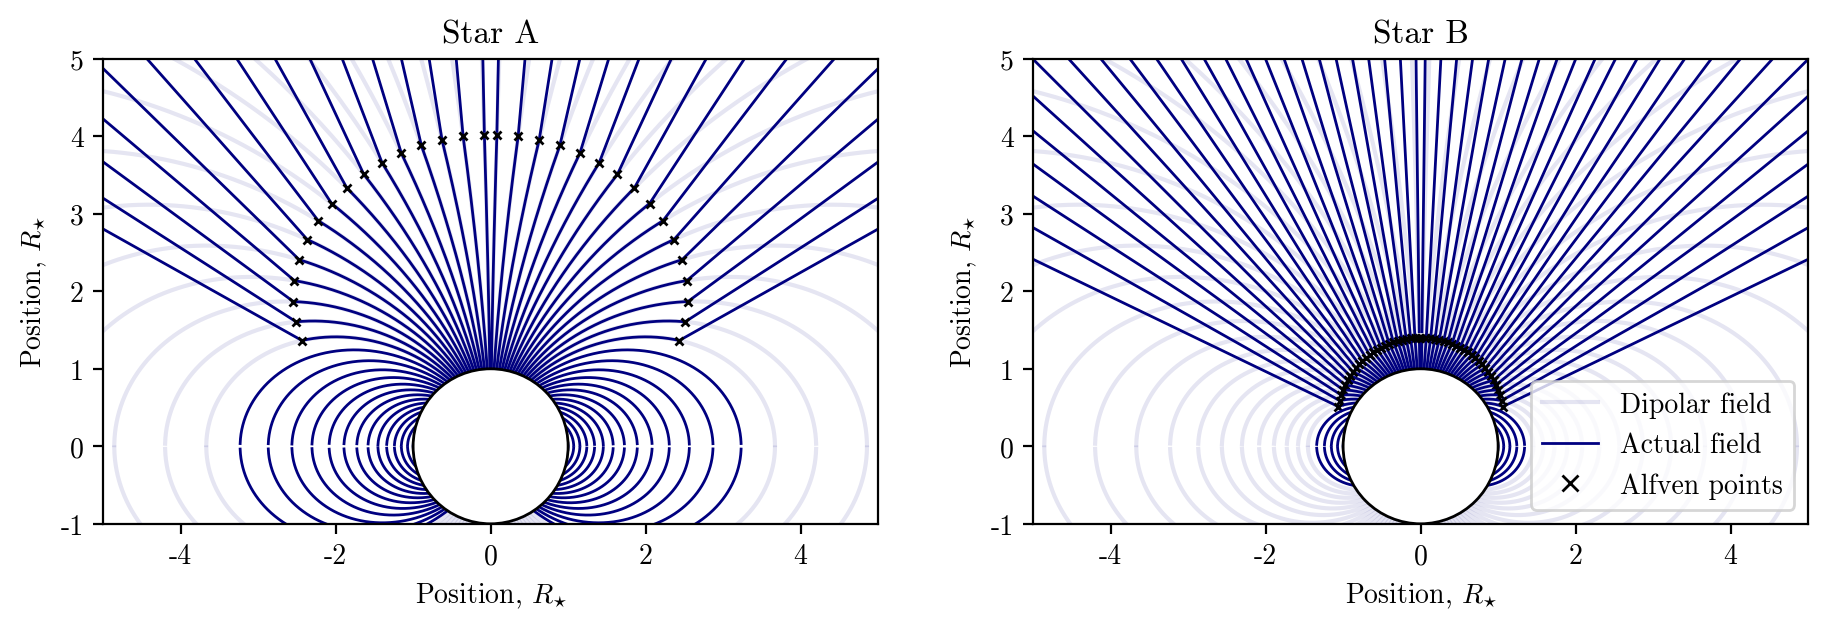

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (11,10), dpi = 200)
S1.plot_field(ax[0], 5, legend = False)
S2.plot_field(ax[1], 5)
for i in range(2):
  ax[i].set_xlabel('Position, $R_{\star}$')
  ax[i].set_ylabel('Position, $R_{\star}$')
  ax[i].set_aspect('equal')
ax[0].set_title('Star A')
ax[1].set_title('Star B')

As expected, the stronger magnetic field of Star A keep more fieldlines closed (dipolar), whereas Star B has more open fieldlines. We assume that for open fieldlines, the field is radial beyond the Alfven surface.

The Alfven surface, $x_c = r_c R_{\star}$, and Alfven velocity, $U_c = \frac{v_p}{2c_s^2}$, (where $r_c$ is actual distance to from the surface of the star, $v_p$ is actual poloidal wind velocity and $c_s$ is the sound speed) are determined following the generalised proceedure in [(Mestel, 1968)](https://ui.adsabs.harvard.edu/abs/1968MNRAS.138..359M/abstract). In particular the equations we solve are 

$\frac{U_c U_s x_c^3}{\left(1-\frac{3}{4}S\right)^{1/2}\left(1-\frac{3}{4}S\right)^{1/2}} = \zeta $, and 

$U_c^2 - \ln U_c = \frac{l}{x_c} + 3\ln x_c - \frac{1}{2}\ln \left(1 - \frac{3}{4}x_cS \right) + \frac{1}{2}x_c^3\kappa l S + A$.
(NEED TO DEFINE EVERYTHING)

We can plot the Alfven surface and Alfven velocity as a function of $S = \sin^2\theta$.

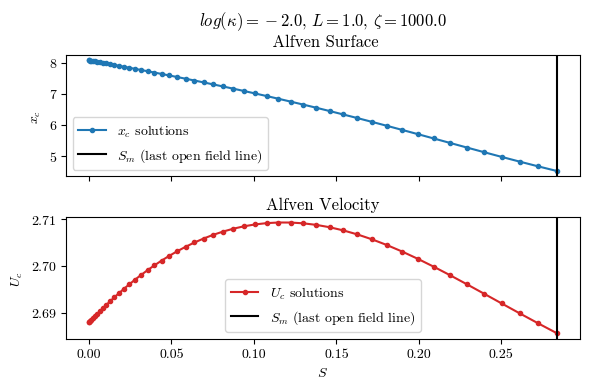

In [7]:
num = 50 # number of fieldlines
S1.plot_Alfven(50)

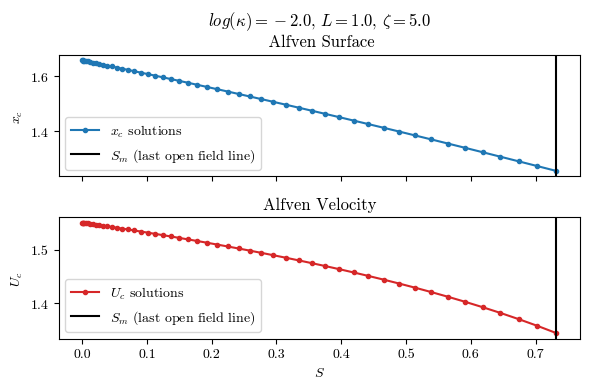

In [8]:
S2.plot_Alfven(50)

### Mass & Angular Momentum Loss

We determine mass and angular momentum loss using the generalised form of the equations in [(Reiners & Mohanty, 2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...746...43R/abstract). Parameters $l$, $\kappa$ and $\zeta$ seize to be sufficient fro these calculations as we require exact values of $M_{\star}$, $R_{\star}$, $P_{\star}$ and $B_{\star}$.

$\dot{M} = $

$\dot{J} = $


### The Sun

The Sun is a main-sequence star with the rotational period of 24 days and the average magnetic field of 1 Gauss. In our target sample of low-mass stars the Sun is considered a slow rotator with a weak magnetic field. The parameter values ($l$, $\kappa$, $\zeta$) for the Sun are:

In [9]:
Sun = Star(M_sun, R_sun, 24, 1)
print('SUN')
print('---')
print('L = ', Sun.l)
print('Kappa = ',  Sun.kappa)
print('Zeta = ', Sun.zeta)
print('Critical fieldline, S_crit = ', Sun.last_fieldline)

SUN
---
L =  1.54202195499472449746747315658
Kappa =  0.0000233111278305020947030235661801
Zeta =  1.06786730469602342274981765513
Critical fieldline, S_crit =  0.985415299566140869090768575279


Text(0.5, 1.0, 'The Sun')

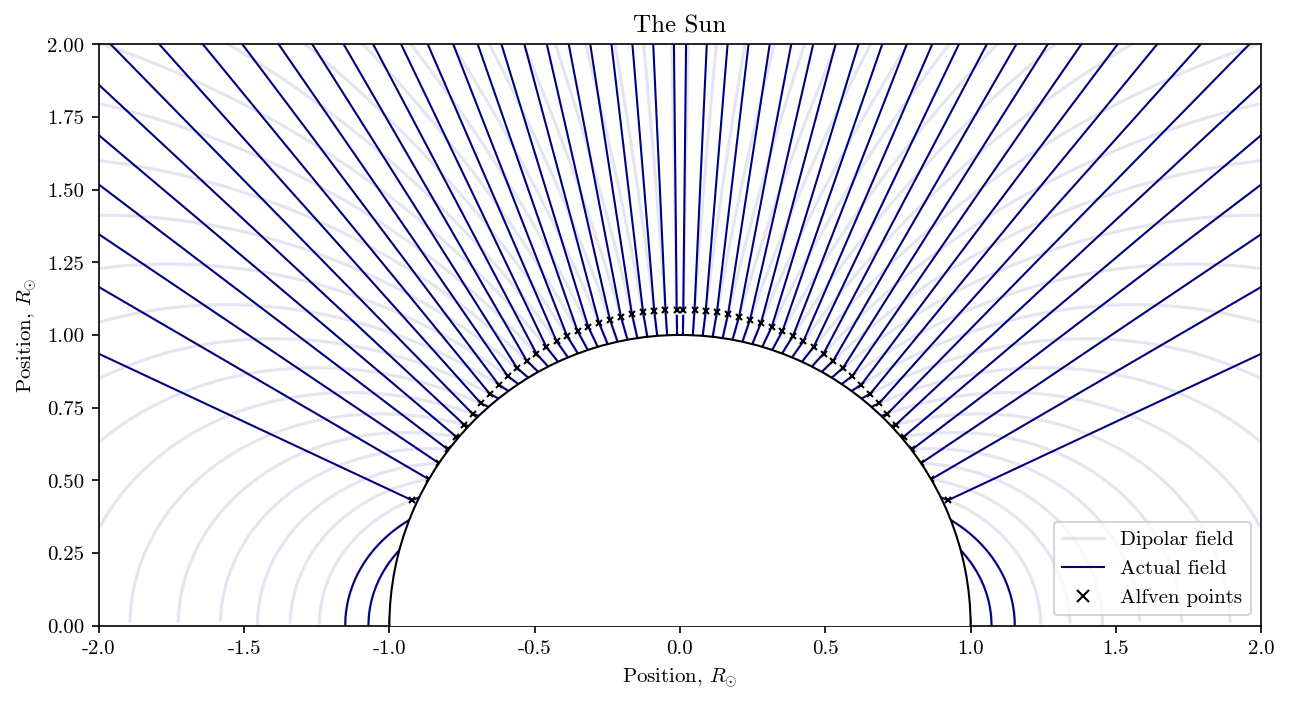

In [10]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 150)
Sun.plot_field(ax, 2)
ax.set_xlabel('Position, $R_{\odot}$')
ax.set_ylabel('Position, $R_{\odot}$')
ax.set_ylim((0,2))
ax.set_aspect('equal')
ax.set_title('The Sun')

For the Sun, we can determine the rate of mass (and angular momentum) loss along each fiedline, $\Delta \dot{M}$.